# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
from unityagents import UnityEnvironment

In [3]:
##!pip -q install ./python

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [4]:
import numpy as np
#from mlagents_envs.environment import UnityEnvironment
#from mlagents_envs.side_channel.engine_configuration_channel import EngineConfigurationChannel
# select this option to load version 1 (with a single agent) of the environment
## Refer this link to know parameter of env https://github.com/Unity-Technologies/ml-agents/blob/main/docs/Python-API.md
env = UnityEnvironment(file_name='Reacher_Windows_x86_64-20/Reacher.exe')
#channel = EngineConfigurationChannel()
#env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe', side_channels=[channel])
#channel.set_configuration_parameters(width = 800)
##channel.set_configuration_parameters(height= 800)


# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
print(brain_name)


ReacherBrain


In [6]:
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

 Clip:[[-0.56802837 -0.71718686 -0.2176386   1.        ]]

In [8]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    #print("-------------------------------------")
    #print(rewards)
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.01749999960884452


In [9]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
cont = 0

In [10]:
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    cont = cont +1
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    #print("----actions-------")
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if(rewards[0] > 0):
        print("Actions "+ str(actions))
        print(next_states)
        print(rewards)
        print(dones)
        
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
print (cont)

Actions [[ 1.          0.52260941  0.70286379  0.76399634]
 [-0.74434282  1.         -0.03406798  0.72706413]
 [ 0.71956643 -0.28276376 -0.04107124  0.92448519]
 [-0.90708258  0.53003507  0.38319468 -1.        ]
 [-0.98125732 -0.06426905 -1.         -1.        ]
 [-0.24774953 -1.          0.26327515  0.51149332]
 [ 0.39052481 -1.          1.         -0.54325758]
 [-1.          1.          0.4245459   1.        ]
 [ 0.41268576 -0.84071621  0.20800313  0.12469832]
 [-0.60796662 -0.29081843 -0.38396085  0.42813375]
 [-0.14110345 -0.85420168 -1.          0.59451093]
 [-1.          1.          0.46415187 -0.67960946]
 [ 0.2641953   0.14703115 -0.61742729 -1.        ]
 [-0.91740478 -1.         -1.          1.        ]
 [-1.          0.43025706  0.34851313  1.        ]
 [ 1.         -1.         -0.1300981  -1.        ]
 [-0.64758753  0.95141033  0.05164332 -0.10950476]
 [-0.0118984   0.06251326 -0.17344446  0.17191666]
 [ 0.86654339 -1.         -1.          1.        ]
 [ 0.13592763 -0.244056

Actions [[-0.17750869 -0.74507376  0.14994426  0.9275744 ]
 [ 1.          0.52510876 -1.          0.73660107]
 [-0.50390629 -1.          1.         -0.70699308]
 [-0.11505679  0.47958514  0.50468514  0.14230258]
 [-0.78500449  0.08430646 -0.10092756 -1.        ]
 [-0.20288463 -0.05257656  0.97003149 -0.09125318]
 [ 0.51129139 -1.          0.00296312  1.        ]
 [ 1.          1.          0.06461594 -0.7172675 ]
 [ 0.77100463 -0.09943758 -0.42449747 -0.53881962]
 [ 0.1527072   0.83280514  0.40969378 -0.39574536]
 [ 0.0972364  -1.         -0.4500529   1.        ]
 [-0.45560358  0.15560516  1.         -1.        ]
 [-0.51782482  0.96539699 -0.25049156 -0.13749   ]
 [-1.         -0.50560722  0.23322058 -1.        ]
 [ 1.          0.02816621 -0.37049182 -0.95005301]
 [ 1.          1.          0.40305376 -0.36002145]
 [ 0.62859292  0.32193936 -0.80779935 -1.        ]
 [ 1.         -0.3616527   1.         -0.51969481]
 [-0.49084624 -0.20673632  1.          1.        ]
 [-0.1377596  -1.      

Total score (averaged over agents) this episode: 0.2939999934285879
1001


When finished, you can close the environment.

In [11]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [12]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from ddpg_agent_20 import Agent
agent = Agent(state_size=33, action_size=4, random_seed=35)
#agent = Agent(state_size=state.size, action_size=4, seed=0)

C:\Users\pelsa\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 10	Average Score: 0.09
Episode 20	Average Score: 0.35
Episode 30	Average Score: 0.68
Episode 40	Average Score: 1.03
Episode 50	Average Score: 1.21
Episode 60	Average Score: 1.34
Episode 70	Average Score: 1.59
Episode 80	Average Score: 1.70
Episode 90	Average Score: 1.88
Episode 100	Average Score: 2.12
Episode 110	Average Score: 2.33
Episode 120	Average Score: 2.50
Episode 130	Average Score: 2.66
Episode 140	Average Score: 2.94
Episode 150	Average Score: 3.12
Episode 160	Average Score: 3.27
Episode 170	Average Score: 3.41
Episode 180	Average Score: 3.51
Episode 190	Average Score: 3.74
Episode 200	Average Score: 3.97
Episode 210	Average Score: 4.17
Episode 220	Average Score: 4.29
Episode 230	Average Score: 4.48
Episode 240	Average Score: 4.81
Episode 250	Average Score: 4.97
Episode 260	Average Score: 5.05
Episode 270	Average Score: 5.26
Episode 280	Average Score: 5.42
Episode 290	Average Score: 5.61
Episode 300	Average Score: 5.79
Episode 310	Average Score: 5.94
Episode 320	Avera

Episode 2460	Average Score: 43.04
Episode 2470	Average Score: 43.18
Episode 2480	Average Score: 43.27
Episode 2490	Average Score: 43.40
Episode 2500	Average Score: 43.53
Episode 2510	Average Score: 43.65
Episode 2520	Average Score: 43.81
Episode 2530	Average Score: 43.96
Episode 2540	Average Score: 44.09
Episode 2550	Average Score: 44.27
Episode 2560	Average Score: 44.43
Episode 2570	Average Score: 44.55
Episode 2580	Average Score: 44.89
Episode 2590	Average Score: 45.08
Episode 2600	Average Score: 45.41
Episode 2610	Average Score: 45.56
Episode 2620	Average Score: 45.73
Episode 2630	Average Score: 45.84
Episode 2640	Average Score: 46.00
Episode 2650	Average Score: 46.24
Episode 2660	Average Score: 46.41
Episode 2670	Average Score: 46.56
Episode 2680	Average Score: 46.71
Episode 2690	Average Score: 46.87
Episode 2700	Average Score: 47.03
Episode 2710	Average Score: 47.42
Episode 2720	Average Score: 47.58
Episode 2730	Average Score: 47.72
Episode 2740	Average Score: 47.86
Episode 2750	A

Episode 4860	Average Score: 82.40
Episode 4870	Average Score: 82.56
Episode 4880	Average Score: 82.76
Episode 4890	Average Score: 82.94
Episode 4900	Average Score: 83.10
Episode 4910	Average Score: 83.28
Episode 4920	Average Score: 83.37
Episode 4930	Average Score: 83.51
Episode 4940	Average Score: 83.70
Episode 4950	Average Score: 83.88
Episode 4960	Average Score: 83.96
Episode 4970	Average Score: 84.09
Episode 4980	Average Score: 84.32
Episode 4990	Average Score: 84.49
Episode 5000	Average Score: 84.61
Episode 5010	Average Score: 84.70
Episode 5020	Average Score: 84.81
Episode 5030	Average Score: 84.92
Episode 5040	Average Score: 85.05
Episode 5050	Average Score: 85.18
Episode 5060	Average Score: 85.29
Episode 5070	Average Score: 85.38
Episode 5080	Average Score: 85.49
Episode 5090	Average Score: 85.66
Episode 5100	Average Score: 85.79
Episode 5110	Average Score: 86.00
Episode 5120	Average Score: 86.28
Episode 5130	Average Score: 86.47
Episode 5140	Average Score: 86.67
Episode 5150	A

Episode 7230	Average Score: 122.90
Episode 7240	Average Score: 123.07
Episode 7250	Average Score: 123.22
Episode 7260	Average Score: 123.33
Episode 7270	Average Score: 123.45
Episode 7280	Average Score: 123.60
Episode 7290	Average Score: 123.78
Episode 7300	Average Score: 124.07
Episode 7310	Average Score: 124.28
Episode 7320	Average Score: 124.47
Episode 7330	Average Score: 124.64
Episode 7340	Average Score: 124.79
Episode 7350	Average Score: 124.91
Episode 7360	Average Score: 125.15
Episode 7370	Average Score: 125.29
Episode 7380	Average Score: 125.57
Episode 7390	Average Score: 125.77
Episode 7400	Average Score: 126.07
Episode 7410	Average Score: 126.22
Episode 7420	Average Score: 126.34
Episode 7430	Average Score: 126.61
Episode 7440	Average Score: 126.77
Episode 7450	Average Score: 126.99
Episode 7460	Average Score: 127.13
Episode 7470	Average Score: 127.29
Episode 7480	Average Score: 127.44
Episode 7490	Average Score: 127.64
Episode 7500	Average Score: 127.69
Episode 7510	Average

Episode 9570	Average Score: 163.62
Episode 9580	Average Score: 163.73
Episode 9590	Average Score: 164.01
Episode 9600	Average Score: 164.27
Episode 9610	Average Score: 164.52
Episode 9620	Average Score: 164.73
Episode 9630	Average Score: 164.94
Episode 9640	Average Score: 165.06
Episode 9650	Average Score: 165.18
Episode 9660	Average Score: 165.39
Episode 9670	Average Score: 165.55
Episode 9680	Average Score: 165.66
Episode 9690	Average Score: 165.85
Episode 9700	Average Score: 166.05
Episode 9710	Average Score: 166.18
Episode 9720	Average Score: 166.32
Episode 9730	Average Score: 166.64
Episode 9740	Average Score: 166.79
Episode 9750	Average Score: 166.97
Episode 9760	Average Score: 167.07
Episode 9770	Average Score: 167.20
Episode 9780	Average Score: 167.30
Episode 9790	Average Score: 167.46
Episode 9800	Average Score: 167.62
Episode 9810	Average Score: 167.76
Episode 9820	Average Score: 168.00
Episode 9830	Average Score: 168.22
Episode 9840	Average Score: 168.37
Episode 9850	Average

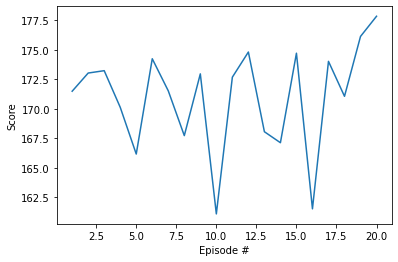

In [14]:
def ddpg(n_episodes=10000, max_t=1500, print_every=10):
    scores_deque = deque(maxlen=print_every)
    #scores = []
    scores = np.zeros(num_agents) 
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations  
        state = states
        #print(states)
        agent.reset()
        score = 0
        t=0
        while True:
            #print ("t="+str(t))
            action = agent.act(state)
            #print("Action:"+ str(action))
            env_info = env.step(action)[brain_name]
            reward2 = env_info.rewards
            #print("Recompensa:"+ str(reward2))
            next_state = env_info.vector_observations
            #print("NextState="+str(next_state))
            done = env_info.local_done
            #print("Done="+str(done))
            reward=reward2[0]
            agent.step(state, action, reward2, next_state, done)
            state = next_state
            #score += reward2
            scores += env_info.rewards 
            #print("Done=" +str(done) + "Score="+ str(score))
            t= t + 1
            if done[0]:
                break
           
        scores_deque.append(scores)
        #scores.append(scores)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [15]:
1e5

100000.0

In [16]:
env.close()